<a href="https://colab.research.google.com/github/VEHEMENT2003/Machinelearnig/blob/main/VGG16forimageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
# Importing dependencies
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, Model
from tensorflow.keras.optimizers import Adam


In [4]:
# Data Curation

# Install Kaggle and upload the kaggle.json file
!pip install kaggle

In [5]:
  # Load Kaggle credentials
kaggle_credentials = json.load(open("/content/kaggle (1).json"))

# Setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

# Download the PlantVillage dataset
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:20<00:00, 140MB/s]
100% 2.04G/2.04G [00:20<00:00, 107MB/s]


In [6]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()
print(os.listdir("plantvillage dataset"))


['color', 'segmented', 'grayscale']


In [7]:
# Dataset Path
base_dir = 'plantvillage dataset/color'
img_size = 224
batch_size = 3

In [8]:
# Data Preprocessing
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [9]:
# Model Definition with VGG16 as base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freezing base model layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# Adding custom layers on top of VGG16
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,3

 Total params: 14,855,782 (56.67 MB)

 Trainable params: 141,094 (551.15 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Set more epochs (20-30) for better results
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14485/14485 ━━━━━━━━━━━━━━━━━━━━ 387s 26ms/step - accuracy: 0.6807 - loss: 1.1430 - val_accuracy: 0.8709 - val_loss: 0.3914
Epoch 2/5
    1/14485 ━━━━━━━━━━━━━━━━━━━━ 5:08 21ms/step - accuracy: 1.0000 - loss: 0.0273

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


14485/14485 ━━━━━━━━━━━━━━━━━━━━ 8s 553us/step - accuracy: 1.0000 - loss: 0.0273 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 3/5
14485/14485 ━━━━━━━━━━━━━━━━━━━━ 426s 26ms/step - accuracy: 0.8902 - loss: 0.3344 - val_accuracy: 0.8894 - val_loss: 0.3223
Epoch 4/5
14485/14485 ━━━━━━━━━━━━━━━━━━━━ 9s 594us/step - accuracy: 0.6667 - loss: 0.5372 - val_accuracy: 0.0000e+00 - val_loss: 2.8417
Epoch 5/5
14485/14485 ━━━━━━━━━━━━━━━━━━━━ 376s 26ms/step - accuracy: 0.9091 - loss: 0.2699 - val_accuracy: 0.9061 - val_loss: 0.2833


In [13]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
3616/3616 ━━━━━━━━━━━━━━━━━━━━ 77s 21ms/step - accuracy: 0.9067 - loss: 0.2852
Validation Accuracy: 90.61%


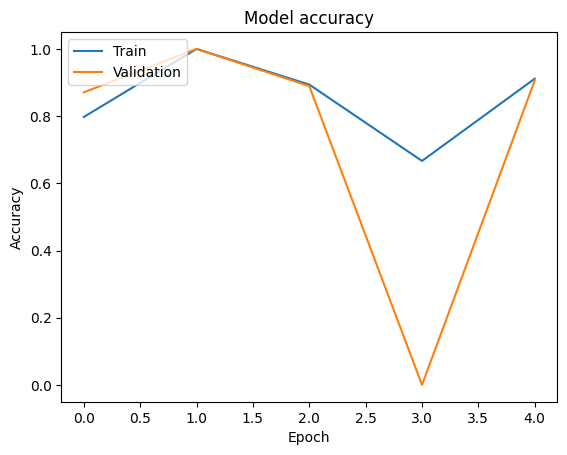

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


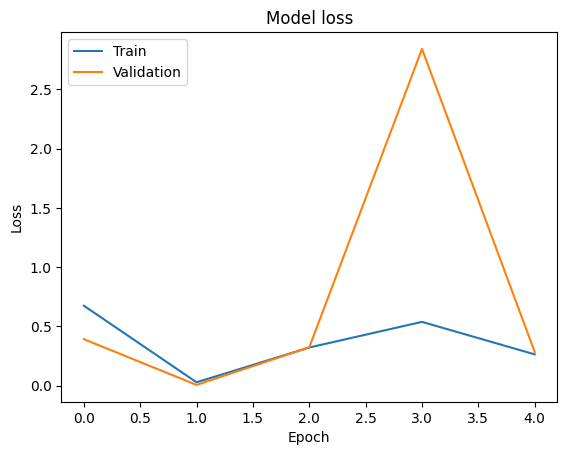

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

3617/3617 ━━━━━━━━━━━━━━━━━━━━ 74s 20ms/step


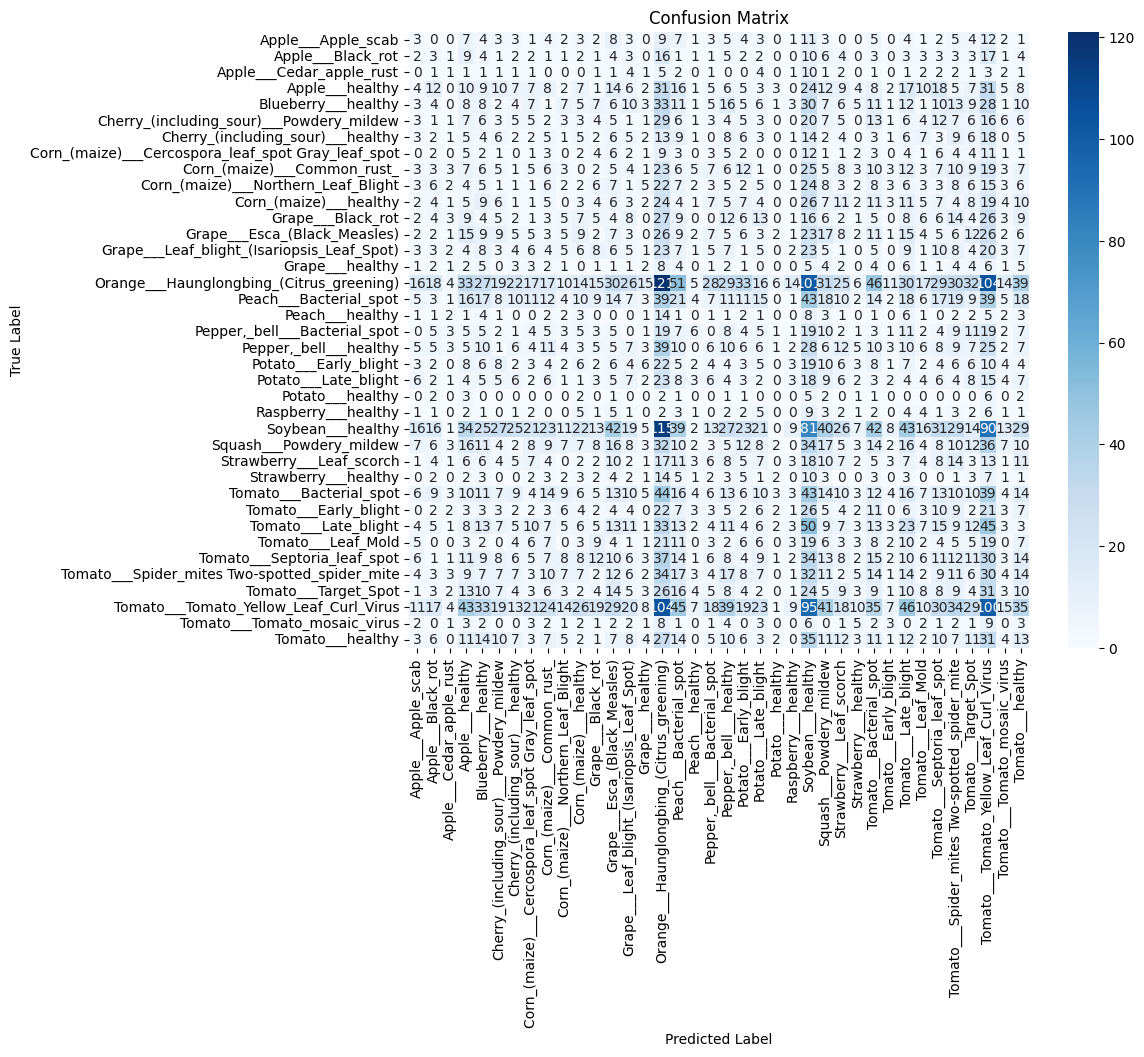

Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.02      0.02      0.02       126
                                 Apple___Black_rot       0.02      0.02      0.02       124
                          Apple___Cedar_apple_rust       0.02      0.02      0.02        55
                                   Apple___healthy       0.03      0.03      0.03       329
                               Blueberry___healthy       0.03      0.03      0.03       300
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       210
                 Cherry_(including_sour)___healthy       0.01      0.01      0.01       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.01      0.01      0.01       102
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       238
               Corn_(maize)___Northern_Leaf_Blight     

In [16]:
 #Bias and Fairness Evaluation
 from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Get predictions
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for detailed analysis
print("Classification Report:\n")
print(classification_report(validation_generator.classes, y_pred, target_names=validation_generator.class_indices.keys()))


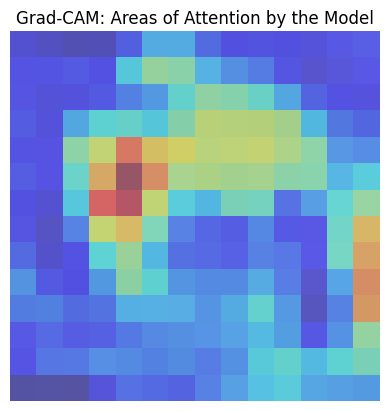

In [18]:
# Model Transparency and Explainability
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Function to get Grad-CAM heatmap
def get_grad_cam(model, img_array, last_conv_layer_name="block5_conv3"):  # VGG16 last conv layer
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Load a sample image
img_path = "/content/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"  # Replace with an actual image path
img = load_img(img_path, target_size=(224, 224))
img_array = np.expand_dims(img_to_array(img) / 255., axis=0)

# Generate Grad-CAM heatmap
heatmap = get_grad_cam(model, img_array)

# Display heatmap
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap
plt.title("Grad-CAM: Areas of Attention by the Model")
plt.axis("off")
plt.show()


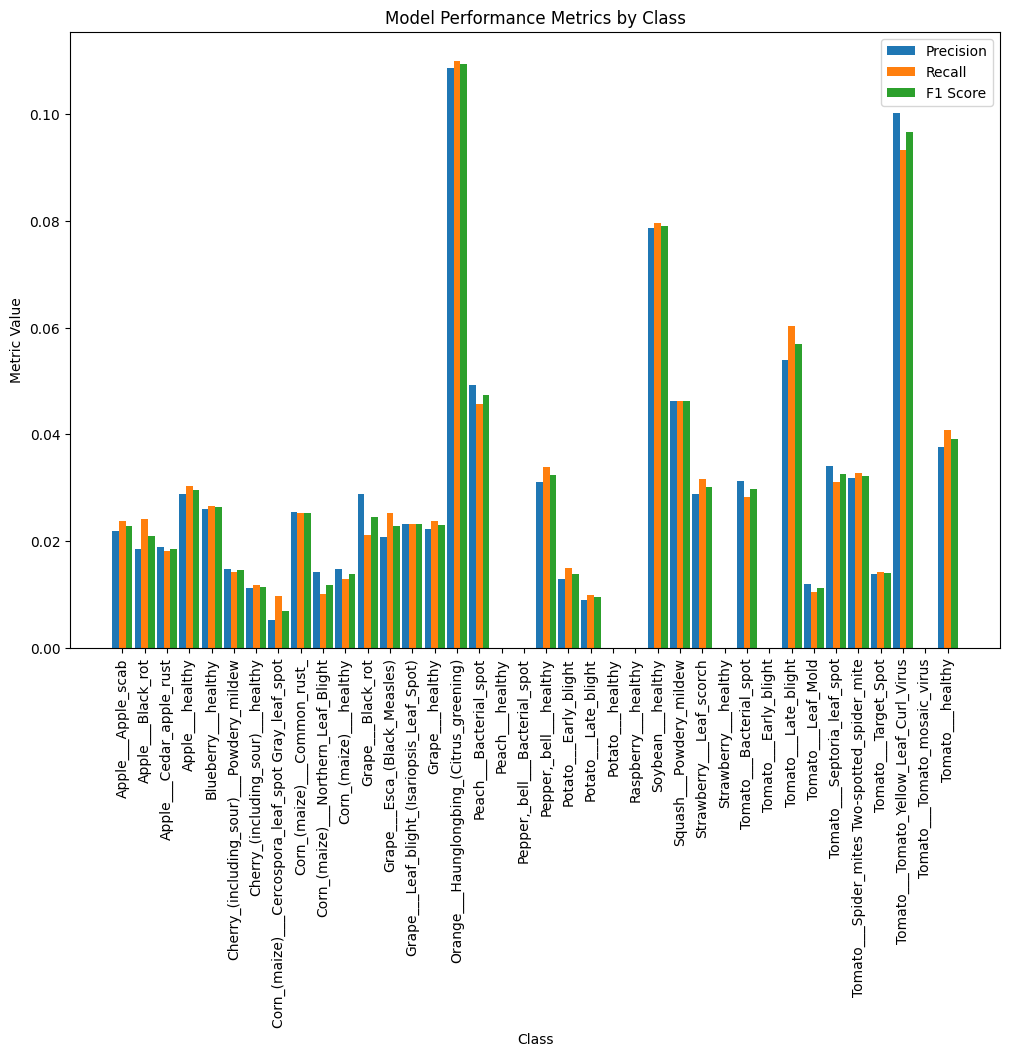

In [19]:
#Performance Metrics Across Subgroups
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for each class
true_labels = validation_generator.classes
precision = precision_score(true_labels, y_pred, average=None)
recall = recall_score(true_labels, y_pred, average=None)
f1 = f1_score(true_labels, y_pred, average=None)

# Plot metrics per class
labels = list(validation_generator.class_indices.keys())
x = np.arange(len(labels))

plt.figure(figsize=(12, 8))
plt.bar(x - 0.3, precision, 0.3, label='Precision')
plt.bar(x, recall, 0.3, label='Recall')
plt.bar(x + 0.3, f1, 0.3, label='F1 Score')
plt.xticks(x, labels, rotation=90)
plt.title("Model Performance Metrics by Class")
plt.xlabel("Class")
plt.ylabel("Metric Value")
plt.legend()
plt.show()


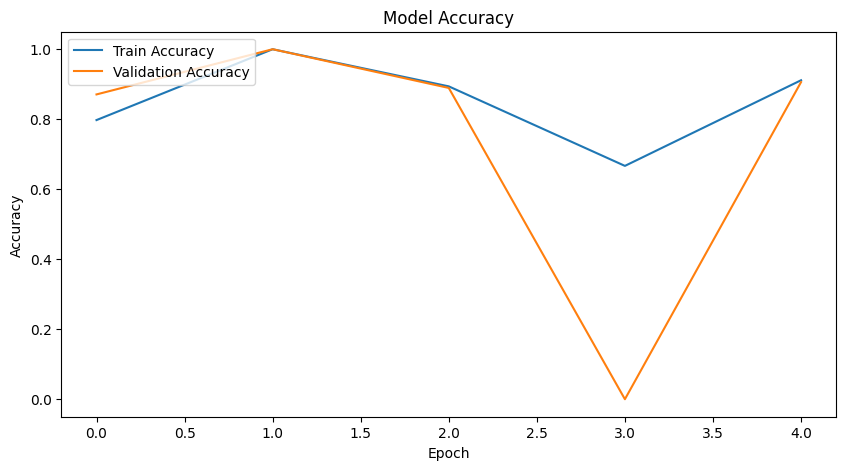

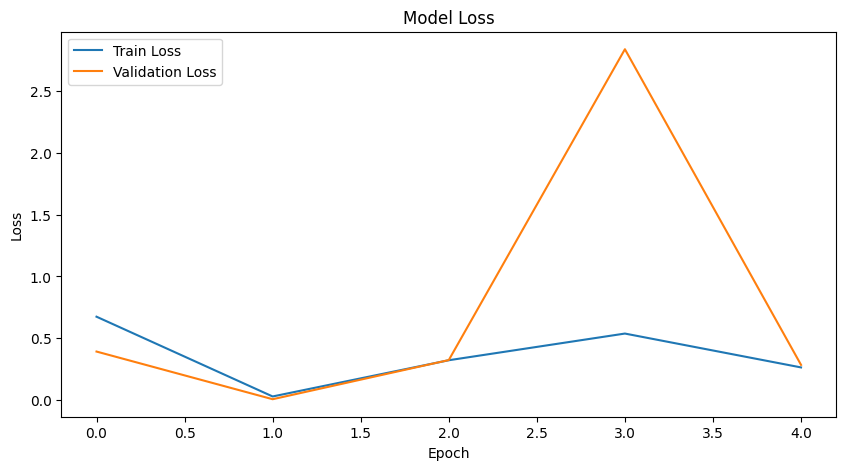

In [20]:
#Visualization of Training and Validation Metrics
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
